In [ ]:
#Importing libraries
import pandas as pd
import csv

In [ ]:
#Reading the dataset
df = pd.read_csv("iris_new.csv", header=None,sep=',',names=["sepal length, sepal width, petal length,petal width,class"])

# **DATA ANALYSIS AND PREPROCESSING**

In [ ]:
#Naming the columns with feature attributes
split_data = df["sepal length, sepal width, petal length,petal width,class"].str.split(",")
data = split_data.to_list()

new_df = pd.DataFrame(data, columns=["sepal length", "sepal width", "petal length","petal width","class"])

new_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
new_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Categorical data present in class feature.

#We convert categorical data to numerical data
for i in range(0,len(new_df['class'])):
  if (new_df['class'][i]=='Iris-setosa'):
    new_df['class'][i]='0'
  elif  (new_df['class'][i]=='Iris-versicolor'):
    new_df['class'][i]='1'
  elif  (new_df['class'][i]=='Iris-virginica'):
     new_df['class'][i]='2'
       


In [ ]:
new_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#Assigning input(x) and output(y) values for trainig and testing of dataset
x = new_df.iloc[:,[0,1,2,3]].values
y = new_df.iloc[:,-1].values

In [ ]:
print(x[:5])

[['5.1' '3.5' '1.4' '0.2']
 ['4.9' '3.0' '1.4' '0.2']
 ['4.7' '3.2' '1.3' '0.2']
 ['4.6' '3.1' '1.5' '0.2']
 ['5.0' '3.6' '1.4' '0.2']]


In [ ]:
x.shape

(150, 4)

In [ ]:
print(y[:5])

['0' '0' '0' '0' '0']


In [ ]:
y.shape

(150,)

In [ ]:
#Reshaping y value 
y = y.reshape((-1,1))
print(y[:5])

[['0']
 ['0']
 ['0']
 ['0']
 ['0']]


# **TRAINING AND TESTING**

In [ ]:
#Splitting the dataset into training and testing. 
#30% used for testing purpose
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
#Analyzing training testing set shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105, 1)
(45, 1)


In [ ]:
#Importing standard scaler function
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

In [ ]:
#Fitting x_train values with caluclated mean and variance values
scalerX = scalerX.fit(x_train)

In [ ]:
scalerX.var_

array([0.63380136, 0.18244354, 2.95590385, 0.57090794])

In [ ]:
scalerX.mean_

array([5.78285714, 3.03428571, 3.69904762, 1.19333333])

In [ ]:
x_train = scalerX.transform(x_train)

In [ ]:
print(x_train[:5])

[[-1.86261343 -0.0802692  -1.51171208 -1.44700339]
 [ 2.40811871 -1.01674326  1.86180444  1.46464977]
 [ 1.27763079 -0.0802692   1.04750735  1.19995403]
 [ 0.27275264 -0.78262474  0.81485104  0.53821468]
 [ 0.14714287 -0.0802692   0.81485104  0.80291042]]


In [ ]:
x_test = scalerX.transform(x_test)

In [ ]:
print(x_test[:5])

[[ 1.40324056  0.38796782  1.1638355   1.46464977]
 [ 1.78006987 -0.0802692   1.22199958  0.53821468]
 [-0.10407667  3.19738998 -1.27905577 -1.04995978]
 [ 2.28250894 -0.0802692   1.68731221  1.19995403]
 [-0.98334505  1.32444188 -1.33721985 -1.31465552]]


# **SUPPORT VECTOR CLASSIFIER**

In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC(C=1,kernel="poly",gamma=1.01)
svc_classifier.fit(x_train,y_train)
y_pred = svc_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 93.33333333333333
F1-score: 93.32591768631814


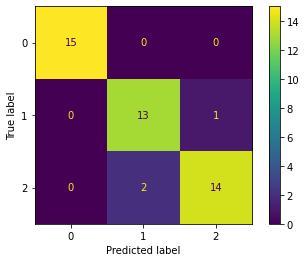

In [ ]:
#Evaluating the metrics
from sklearn.metrics import accuracy_score,f1_score
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)
print("F1-score:",f1_score(y_test,y_pred,average='macro')*100)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

# **Testing with new input value**

In [ ]:
import numpy as np
input_data = (7.0	,3.2,	4.7,	1.4)
newdata = np.asarray(input_data)
newdata2 = newdata.reshape((1,-1))

prediction = svc_classifier.predict(newdata2)
print(prediction)
   

['1']


# **HYPERTUNING OF PARAMETERS USING GRIDSEARCHCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter_grid = [{'C':[1,1.05,1.2,1.001],'kernel':['rbf','poly'],'gamma':[0.1,0.001,1.01,1,1.05]}]
grid_searchobj = GridSearchCV(estimator=svc_classifier,param_grid=parameter_grid,scoring='accuracy',cv=10,)
grid_result = grid_searchobj.fit(x_train,y_train)
grid_result.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

# **DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)

Accuracy score: 95.55555555555556
F1 score: 95.53571428571429


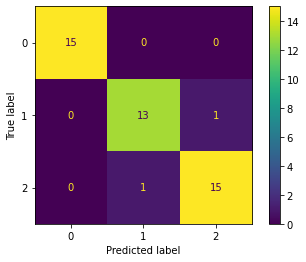

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
print("Accuracy score:",accuracy_score(y_test,y_pred)*100)
print("F1 score:",f1_score(y_test,y_pred,average='macro')*100)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

## **KNEIGHBORS CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn_classifier = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn_classifier.fit(x_train,y_train)
y_pred = knn_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score: 93.33333333333333
F1 score: 93.31896551724138


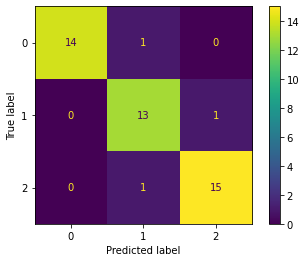

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
print("Accuracy score:",accuracy_score(y_test,y_pred)*100)
print("F1 score:",f1_score(y_test,y_pred,average='macro')*100)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
import numpy as np
input_data = (7.0	,3.2,	4.7,	1.4)
newdata = np.asarray(input_data)
newdata2 = newdata.reshape((1,-1))

prediction = knn_classifier.predict(newdata2)
print(prediction)

if (prediction[0]==0):
  print ("Iris-setosa")
elif(prediction[0]==1):
  print("Iris-versicolor")
else:
  print("Iris-virginica")

['2']
Iris-virginica


# **NAIVE BAYES CLASSIFIER**

Accuracy:  75.55555555555556
F-Measure:  71.7586649550706
Confusion Matrix: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


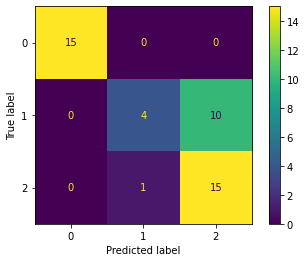

In [ ]:
#Bernoulli NB
from sklearn.naive_bayes import BernoulliNB
nb_classifier = BernoulliNB()
nb_classifier.fit(x_train,y_train)
y_pred = nb_classifier.predict(x_test)

from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F-Measure: ",f1_score(y_test,y_pred,average='macro')*100)

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

# **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() #100 trees by default 
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:  95.55555555555556
F-Measure:  95.53571428571429
Confusion Matrix: 


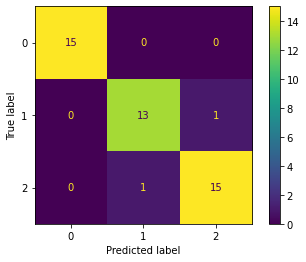

In [ ]:

from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F-Measure: ",f1_score(y_test,y_pred,average='macro')*100)

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))